# Pennant pattern Long - Strategy - Backtesting 

### Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
#
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
from backtesting.backtesting import Backtest, Strategy
# from backtesting._plotting import set_bokeh_output
# set_bokeh_output(notebook=False)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120

Loading BokehJS ...

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
data = data[data.index > '2020-11-01 00:00:00']
# data = data[(data.index > '2020-11-01 00:00:00') & (data.index < '2024-10-01 00:00:00')]
# data = data[data.index > '2024-11-01 00:00:00']

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-11-02 09:00:00,900.1,900.2,899.3,900.1,1910
2020-11-02 09:05:00,900.2,900.2,898.7,899.4,1670
2020-11-02 09:10:00,899.5,900.0,899.0,899.5,1329
2020-11-02 09:15:00,899.4,899.5,898.2,898.6,1722
2020-11-02 09:20:00,898.5,898.6,896.5,898.2,2939
...,...,...,...,...,...
2025-10-30 14:10:00,1916.0,1925.4,1915.3,1922.5,13042
2025-10-30 14:15:00,1922.6,1923.0,1910.5,1918.6,16670
2025-10-30 14:20:00,1917.7,1925.0,1915.0,1917.4,12613


In [8]:
def cal_signal(r):
    signal = ''
    if r['cond_1'] == True and r['cond_2'] == True:
        signal = 'long'
    return signal

def prepare_data(df):
    # Cond 1: 4 đáy liên tiếp cao dần
    df['cond_1'] = (
        (df['Low'].shift(3) < df['Low'].shift(2)) &
        (df['Low'].shift(2) < df['Low'].shift(1)) &
        (df['Low'].shift(1) < df['Low'])
    )

    # Cond 2: 4 đỉnh liên tiếp thấp dần
    df['cond_2'] = (
        (df['High'].shift(3) > df['High'].shift(2)) &
        (df['High'].shift(2) > df['High'].shift(1)) &
        (df['High'].shift(1) > df['High'])
    )

    df['signal'] = df.apply(lambda r: cal_signal(r), axis=1)
    return df

In [9]:
prepared_data = prepare_data(data)
prepared_data.dropna(inplace=True)

In [16]:
prepared_data[prepared_data.signal == 'long']

,Open,High,Low,Close,Volume,cond_1,cond_2,signal
Date,,,,,,,,
2020-11-03 14:30:00,909.0,909.0,909.0,909.0,38,True,True,long
2020-12-09 14:30:00,1004.7,1004.7,1004.4,1004.4,122,True,True,long
2021-05-13 09:30:00,1377.8,1378.5,1377.0,1377.5,2156,True,True,long
2021-07-29 11:30:00,1423.2,1423.2,1423.1,1423.1,26,True,True,long
2021-09-20 14:25:00,1456.8,1456.8,1455.5,1455.6,3869,True,True,long
2021-09-20 14:30:00,1455.6,1455.6,1455.6,1455.6,62,True,True,long
2022-01-26 14:30:00,1519.3,1519.3,1519.3,1519.3,25,True,True,long
2022-01-28 14:15:00,1526.4,1529.0,1526.1,1527.5,4351,True,True,long
2022-03-07 14:45:00,1504.2,1504.2,1504.2,1504.2,3862,True,True,long


In [10]:
class MainStrategy(Strategy):
    SL = 3.5
    RR = 3
    def init(self):
        self._broker._cash = 1500
        super().init()

    def next(self):
        super().next()
        _time = self.data.index
        current_time = _time[-1]
        if current_time.hour == 14 and current_time.minute >= 25:
            if self.position.is_long:
                self.position.close()
            return

        if self.position:
            return 
        signal = self.data.signal[-1]
        close_price = self.data.Close[-1]
        open_price = self.data.Open[-1]
        if signal == 'long':
            buy_price = close_price
            sl = buy_price - self.SL
            tp = buy_price + self.SL * self.RR
            self.buy(size=1, sl=sl, tp=tp)

In [11]:
bt = Backtest(prepared_data, MainStrategy, commission=.0003, exclusive_orders=True)
stats = bt.run()

In [12]:
stats

Start                     2020-11-02 09:00:00
End                       2025-10-30 14:45:00
Duration                   1823 days 05:45:00
Exposure Time [%]                     0.21485
Equity Final [$]                   1502.73189
Equity Peak [$]                    1509.45675
Commissions [$]                      11.36811
Return [%]                            0.18213
Buy & Hold Return [%]               114.08732
Return (Ann.) [%]                     0.03678
Volatility (Ann.) [%]                 0.67157
CAGR [%]                              0.02515
Sharpe Ratio                          0.05476
Sortino Ratio                         0.09712
Calmar Ratio                          0.02985
Alpha [%]                             0.03676
Beta                                  0.00127
Max. Drawdown [%]                     -1.2323
Avg. Drawdown [%]                    -0.69004
Max. Drawdown Duration      938 days 04:30:00
Avg. Drawdown Duration      395 days 13:32:00
# Trades                          

In [13]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,SL,TP,PnL,Commission,ReturnPct,EntryTime,ExitTime,Duration,Tag
0,1,6574,6574,1377.5,1374.0,1374.0,1388.0,-4.32545,0.82545,-0.003140,2021-05-13 09:35:00,2021-05-13 09:35:00,0 days 00:00:00,None
1,1,9403,9405,1424.0,1419.6,1419.6,1433.6,-5.25308,0.85308,-0.003689,2021-07-29 13:00:00,2021-07-29 13:10:00,0 days 00:10:00,None
2,1,26177,26189,946.5,942.4,942.4,956.4,-4.66667,0.56667,-0.004930,2022-11-21 13:00:00,2022-11-21 14:00:00,0 days 01:00:00,None
3,1,39179,39191,1069.9,1080.4,1066.4,1080.4,9.85491,0.64509,0.009211,2023-11-28 13:00:00,2023-11-28 14:00:00,0 days 01:00:00,None
4,1,39536,39548,1099.1,1110.2,1096.2,1110.2,10.43721,0.66279,0.009496,2023-12-07 13:00:00,2023-12-07 14:00:00,0 days 01:00:00,None
5,1,41267,41281,1179.9,1176.4,1176.4,1190.4,-4.20689,0.70689,-0.003565,2024-01-25 13:00:00,2024-01-25 14:10:00,0 days 01:10:00,None
6,1,44019,44025,1226.8,1223.2,1223.2,1237.2,-4.33500,0.73500,-0.003534,2024-04-17 13:00:00,2024-04-17 13:30:00,0 days 00:30:00,None
7,1,45192,45198,1286.5,1283.0,1283.0,1297.0,-4.27085,0.77085,-0.003320,2024-05-24 13:00:00,2024-05-24 13:30:00,0 days 00:30:00,None
8,1,52737,52755,1317.0,1320.1,1313.6,1327.6,2.30887,0.79113,0.001753,2024-12-20 13:00:00,2024-12-20 14:30:00,0 days 01:30:00,None
9,1,53390,53403,1315.5,1312.1,1312.1,1326.1,-4.18828,0.78828,-0.003184,2025-01-09 11:30:00,2025-01-09 14:00:00,0 days 02:30:00,None


In [14]:
# bt.plot()

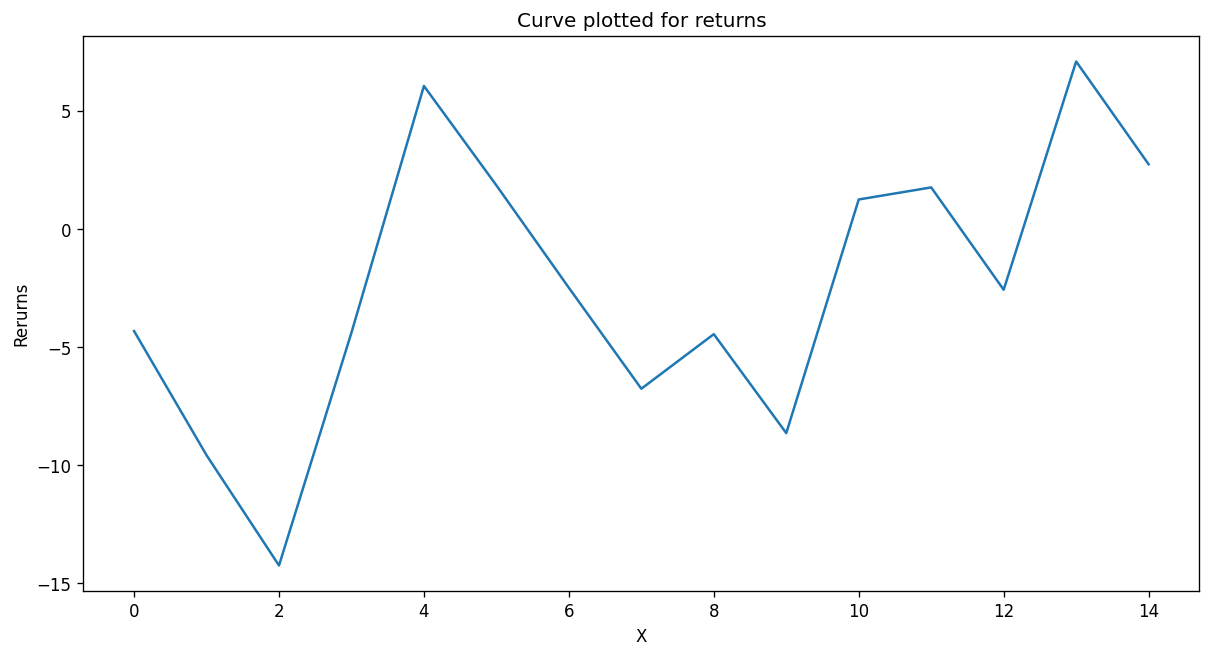

In [15]:
copy_trades = stats['_trades'].copy()
copy_trades['cum_sum'] = copy_trades['PnL'].cumsum()
X = np.array(range(0, len(copy_trades['cum_sum'])))
Y = copy_trades['cum_sum']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for returns")
plt.xlabel("X")
plt.ylabel("Rerurns")
plt.show()